<a href="https://colab.research.google.com/github/aerimili/EIE401-1-Multimedia/blob/main/Actividades/Actividad_4/Actividad_4_VillalobosAlejandra_20914803-K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Alejandra Villalobos</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
#Generación de señal rectangular.
sig = np.repeat([0., 1., 0.], 100)

#Generación de ventana de Hann.
win = signal.windows.hann(50)

In [ ]:
def convolucion(signal1, signal2):
  """
  Realiza la convolución entre dos señales.

  Parámetros:
  signal1: Primera señal.
  signal2: Segunda señal.
  """
  #Lista de ceros para guardar los resultados.
  conv = (len(signal1) - len(signal2) + 1)*[0]


  for l in range(len(conv)):

    #Realiza la suma de las señales en la posición actual.
    for i in range(len(signal2)):
      conv[l] += signal1[l + i] * signal2[i]

  return conv

#Convolución entre las dos señales sig y win.
convolution = convolucion(sig, win)

In [ ]:
#Gráfica de señal rectangular, ventana de Hann y la convolución de estas.
plt.figure(figsize = (14,7))
plt.subplot(3,1,1)
plt.plot(sig)
plt.title("Señal rectangular")
plt.ylabel("Amplitud")

plt.subplot(3,1,2)
plt.plot(np.linspace(0, 300, 50), win)
plt.title("Ventana de Hann")
plt.ylabel("Amplitud")

plt.subplot(3,1,3)
plt.plot(convolution)
plt.title("Convolución de señal rectangular y ventana de Hann")
plt.xlabel("Índice de muestra")
plt.ylabel("Amplitud")

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


In [ ]:
#Frecuencia de seno en Hz.
f1 = 20

#Frecuencia de coseno en Hz.
f2 = 55

t_inicio = -1
t_final = 1

#Frecuencia de muestreo.
fs = 1000

#Creación vector tiempo.
t = np.linspace(t_inicio, t_final, fs)

#Señal original.
señal = np.sin(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)

In [ ]:
#Creación de ruido Gaussiano.
ruido = np.random.normal(0, 1, len(señal))

#Señal con ruido agregado.
señal_ruido = señal + ruido

In [ ]:
#Gráficas de señal original y señal con ruido.
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.plot(t, señal)
plt.title("Señal original")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")

plt.subplot(122)
plt.plot(t, señal_ruido)
plt.title("Señal con ruido")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")

In [ ]:
def fft(x):
  """
  Calcula la transformada de Fourier de una señal.

  Parámetros:
  x: Secuencia de datos de la señal.
  """
  #Número de muestras.
  N = len(x)

  #Vector salida.
  X = np.zeros(N, dtype = complex)

  #Calcula la transformada de Fourier para cada frecuencia.
  for k in range(N):
    for n in range(N):
      #Fórmula de transformada de Fourier.
      X[k] += x[n] * np.exp(-2j *np.pi * k * n/N)

  return X

#Calculo de transformafa de fourier de la señal con ruido.
tf = fft(señal_ruido)

n = len(t)

#Cálculo de la densidad espectral de potencia.
dep = tf * np.conj(tf) / n

#Vector de frecuencias.
freq = (1/fs*n) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype = "int")

In [ ]:
#Gráfica de comparación entre señal original, con ruido y su densidad espectral de potencia.
plt.figure(figsize = (18,6))
plt.subplot(121)
plt.plot(señal_ruido, label = "ruido")
plt.plot(señal, label = "original")
plt.title("Señal original v/s se al con ruido")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.legend()

plt.subplot(122)
plt.plot(freq[L], dep[L], color = "purple")
plt.title("Densidad espectral de potencia ")
plt.xlabel("Frecuencias[Hz]")
plt.ylabel("Potencia")


In [ ]:
#Encuentra todos los valores de dep mayores a 100.
indices = dep > 100

#Vuelve 0 los valores de dep menores que 100.
psd_clean = dep*indices
tf = indices*tf

def ifft(x):
  """
  Calcula la transformada de Fourier inversa de una señal

  Parámetros:
  x: Transformada de Fourier de una señal
  """

  #Número de muestras.
  N = len(x)

  #Vector salida
  X = np.zeros(N, dtype = complex)

  #Calcula la transformada de Fourier inversa para cada frecuencia.
  for k in range(N):
    for n in range(N):
      #Fórmula de transformada de Fourier inversa.
      X[k] += x[n] * np.exp(2j *np.pi * k * n/N)

  return X/N

#Transformada de fourier inversa de la señal filtrada.
tffilt = ifft(tf)

In [ ]:
#Gráfica de la señal filtrada.
plt.figure(figsize = (8,5))
plt.plot(t, tffilt)
plt.title("Señal filtrada")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[s]")

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
  """
  Calcula el wavelet "mexican hat".

  Parámetros:
  x: Vector donde se evalúa la función.
  mu: Media.
  sigma: Desviación estándar.
  """
  #Calcula la funcion Mexican Hat.
  mex_hat = (2/(np.sqrt(3*sigma)*pow(np.pi,1/4)))*np.exp(-x**2/(2*sigma**2))*(1-(x**2/sigma**2))
  return mex_hat

#Creación vector tiempo
x = np.linspace(-5,5,100)

#Creación de wavelet mexican hat con media 0 y desviación estándar 1.
wavelet = mexican_hat(x, 0, 1)

In [ ]:
#Gráfica del Mexican hat wavelet.
plt.plot(x, wavelet)
plt.title("Mexican hat wavelet")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

In [ ]:
a0 = 2
b0 = 1
m = 1
t = np.linspace(-1,1,1000) #Creación vector tiempo.
original = np.sin(2*np.pi*f1*t) #Señal original.
ruido = np.random.normal(0, 1, len(original)) #Creación de ruido gaussiano.
señal_estudio = original + ruido #Señal de estudio con ruido.

def transformada_w(signal, a0, b0, m):
  """
  Calcula la transformada discreta de wavelet.

  Parámetros:
  signal: Señal a realizar la transformada.
  a0: Parámetro a0.
  b0: Parámetro b0.
  m: Nivel específico.
  """
  transformada_discreta = np.zeros_like(signal) #Creación de vector de ceros con tamaño de la señal.

  for n in range(len(signal)):
    for i, x in enumerate(t): #Se itera sobre los índices y valores de la señal.

      #Calcula la transformada discreta de wavelet.
      transformada_discreta += signal[i] * a0*(-m/2) * mexican_hat(a0**(-m)*x - m*b0, 0, 1)

      return transformada_discreta

td = transformada_w(señal_estudio, a0, b0, m) #Calcula la transformada discreta de wavelet a la señal de estudio.


###  3.2.1. Explica el siguiente fragmento de código en detalle

In [ ]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet

def psi_mn(psi, m, n): #recibe el wavelet
  """
  Calcula el valor de la función gaussiana.

  Parámetros:
  psi: Wavelet.
  m: Factor de escala.
  n: Factor de traslación.
  """

  #Cálculo de valores de escala y traslación
  a = 2**m
  b = n*2**m
  #Arreglo de ceros
  wav = np.zeros(len(psi)*a + b)  #se esta desplazando la señal y se va achicando y agrandando
  #Interpolación
  wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)

  return wav

#Define el wavelet como la función mexican_hat creada anteriormente
psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
#Creación de listas con distintos factores de escalación y traslación
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

#Generación de gráficas para distintos numeros de escalación y traslación
for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

El código proporcionado implementa una función llamada psi_mn, que se encarga de generar una versión escalada y desplazada de un wavelet dado. En el contexto de la función, el parámetro 'm' controla la dilatación del wavelet, mientras que el parámetro 'n' regula su traslación a lo largo del eje x. Es evidente en los gráficos generados que, para un mismo valor de 'n', el efecto de traslación aumenta conforme 'm' incrementa, manteniendo la proporción en relación al tamaño del wavelet. Esto sugiere que el parámetro $b_0$, establecido en 1 en el código, en realidad controla el grado de traslape entre dos wavelets adyacentes.

### 3.2.2 completa el siguiente código para realizar la transformada


In [ ]:
"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    f_scaled = f[::2**m]
    transform_scaled = 2**(m/2.0) * np.sum(f_scaled[n:n+len(psi)] * psi)
    return transform_scaled
"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    pmn = psi_mn(psi, m, n)
    transform = 2**(-m/2.0) * np.sum(f[:len(pmn)] * pmn)
    return transform

m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,2, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

In [ ]:
#Instalar librería PyWavelets en Google Colab
!pip install PyWavelets

In [77]:
import pywt
import pandas as pd

link = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"

#Lectura de datos en el enlace entregado.
datos = pd.read_table(link)

#Sacamos la serie de tiempo de los datos.
signal = datos.values.squeeze()

#Aplicación de la transformada continua a los datos, utilizando el wavelet mexican hat.
coef, freqs = pywt.cwt(data=signal, scales = np.arange(1, 128), wavelet = "mexh")

#Pasamos datos a términos de potencia.
power = (abs(coef))**2

Text(0, 0.5, 'Frecuencia')

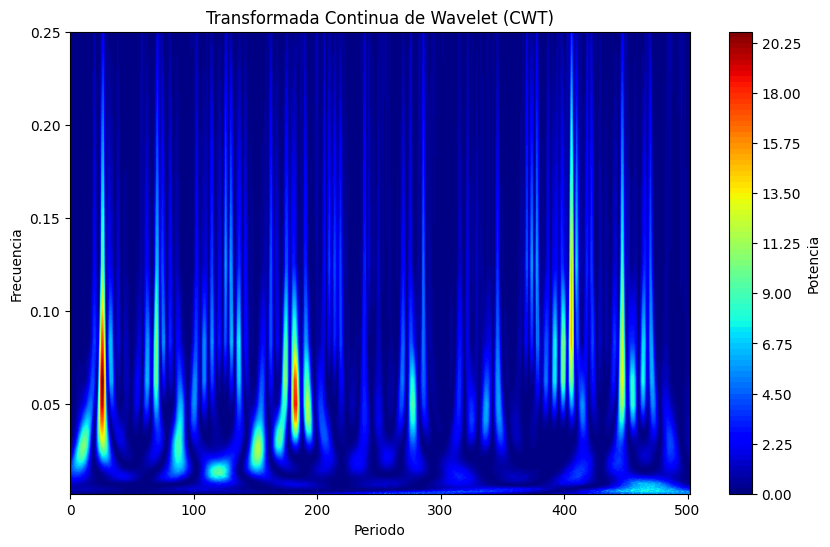

In [81]:
#Escalograma de la transformada continua.
plt.figure(figsize=(10, 6))
plt.contourf(np.arange(len(signal)), freqs, power, cmap='jet', levels=100)
plt.colorbar(label='Potencia')
plt.title('Transformada Continua de Wavelet (CWT)')
plt.xlabel('Periodo')
plt.ylabel('Frecuencia')

### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

El gráfico de contorno muestra la potencia de los coeficientes de la transformada de wavelet en diferentes periodos y frecuencias. El eje "x" representa el periodo de tiempo, mientras que el eje "y" representa la frecuencia. La barra de colores indica la potencia de los coeficientes, donde el rojo representa alta potencia y el azul representa baja potencia.

El gráfico muestra que el fenómeno del Niño tiene una fuerte periodicidad de alrededor 5 años. Esto es evidente a partir de las bandas verticales de alta potencia que están espaciadas aproximadamente 5 años. El gráfico también muestra que el fenómeno del Niño tiene una amplia gama de frecuencias, siendo algunos períodos más dominantes que otros. Esto es evidente por el hecho de que las bandas de alta potencia no están espaciadas uniformemente.

El gráfico se puede utilizar para identificar los períodos y frecuencias más asociados con el fenómeno del Niño. Esta información se puede utilizar para predecir ocurrencias futuras del fenómeno y mitigar sus efectos.


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/